# Desafio: Descubra as melhores notas de matemática do ENEM 2016

# EDA: Entendendo o problema

Y = nota de matemática ENEM 2016

## Dados de treino

### Conhecendo a base de dados

In [1]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
# load train dataset
train = pd.read_csv('train.csv')

# create a copy dataframe
df_train = train.copy()

In [3]:
pd.set_option("display.max_rows", 200, "display.max_columns",50)

In [4]:
# print first 5 rows
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,...,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,...,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,...,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,...,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,...,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [5]:
# drop first column
df_train.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df_train.shape

(13730, 166)

In [7]:
df_train.dtypes

NU_INSCRICAO                    object
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                         int64
TP_SEXO                         object
TP_ESTADO_CIVIL                float64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC   

### Colunas sobre as questões da prova

In [8]:
df_train.Q026

0        C
1        A
2        A
3        C
4        B
        ..
13725    B
13726    B
13727    A
13728    C
13729    A
Name: Q026, Length: 13730, dtype: object

As colunas que começam com Q0 se referem as repostas das questões das provas. Vou excluí-las, porque elas não agregam valor ao modelo.

In [9]:
df_train = df_train.loc[:, ~df_train.columns.str.startswith('Q0')]

In [10]:
train.shape

(13730, 167)

In [11]:
df_train.shape

(13730, 116)

### Dados Faltantes

Existem muitas colunas, vou investigar as que menos variam e as que têm missing values a seguir:

In [12]:
#a new dataframe to explore the variables
cons = pd.DataFrame({'columns' : df_train.columns,
                    'type': df_train.dtypes,
                    'missing' : df_train.isna().sum(),
                    'size' : df_train.shape[0],
                    'uniques': df_train.nunique()})
cons['proportion'] = round(cons['missing'] / cons['size'],2)

In [13]:
cons.sort_values('uniques', ascending = False)

,columns,type,missing,size,uniques,proportion
NU_INSCRICAO,NU_INSCRICAO,object,0,13730,13730,0.00
TX_RESPOSTAS_CH,TX_RESPOSTAS_CH,object,3389,13730,10339,0.25
TX_RESPOSTAS_CN,TX_RESPOSTAS_CN,object,3389,13730,10335,0.25
TX_RESPOSTAS_LC,TX_RESPOSTAS_LC,object,3597,13730,10128,0.26
TX_RESPOSTAS_MT,TX_RESPOSTAS_MT,object,3597,13730,10124,0.26
NU_NOTA_MT,NU_NOTA_MT,float64,3597,13730,3406,0.26
CO_ESCOLA,CO_ESCOLA,float64,9448,13730,3333,0.69
NU_NOTA_CH,NU_NOTA_CH,float64,3389,13730,2978,0.25
NU_NOTA_LC,NU_NOTA_LC,float64,3597,13730,2774,0.26
CO_MUNICIPIO_RESIDENCIA,CO_MUNICIPIO_RESIDENCIA,int64,0,13730,2709,0.00


In [14]:
print('Contagem de colunas com ATÉ 20% de dados faltantes', cons[cons.proportion < 0.2].shape[0])
print('Contagem de colunas com 0% de dados faltantes',  cons[cons.proportion == 0].shape[0])

Contagem de colunas com ATÉ 20% de dados faltantes 85
Contagem de colunas com 0% de dados faltantes 80


In [15]:
# columns types without missing values
cons[cons.proportion == 0]['type'].value_counts()

int64     70
object    10
Name: type, dtype: int64

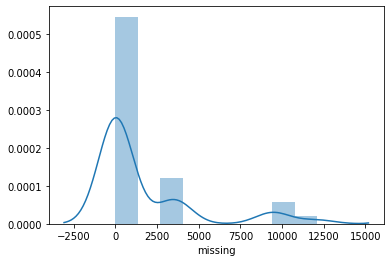

In [16]:
sns.distplot(cons.missing)

### Colunas numéricas

In [17]:
# Columns type
cons.type.value_counts()

int64      70
object     24
float64    22
Name: type, dtype: int64

In [18]:
# dataset with only numeric variables
numeric_columns = list(df_train.columns[df_train.dtypes != 'object'])
df_num_train = df_train[numeric_columns]

In [19]:
df_num_train = df_train[(numeric_columns)]

In [20]:
df_num_train.head()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,...,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,2016,4314902,43,24,0.0,1,1,4314902.0,43.0,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,NaN,4314902,43,1,1,1,1,436.3,495.4,581.2,399.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,2016,2304707,23,17,0.0,3,1,2304707.0,23.0,2,0,2,1.0,0,23005157.0,2304707.0,23.0,2.0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,2304707,23,1,1,1,1,474.5,544.1,599.0,459.8,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,2016,2304400,23,21,0.0,3,1,2304400.0,23.0,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,NaN,2304400,23,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,3304557,33,25,0.0,0,1,3304557.0,33.0,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,NaN,3304557,33,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1302603,13,28,0.0,2,1,1505304.0,15.0,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,NaN,1302603,13,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# descriptive stats
df_num_train.describe()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,...,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4.282000e+03,4.282000e+03,4282.000000,4282.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.0,...,13730.000000,13730.0,13730.0,13730.0,13730.000000,13730.000000,1638.000000,1.373000e+04,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,2.146176,1.353532,1.178888,0.129862,3.121720e+07,3.123638e+06,31.085474,2.259692,1.030827,1.001635,0.001238,0.0,0.000364,0.000510,0.0,...,0.000073,0.0,0.0,0.0,0.000364,0.119301,30.639194,3.085637e+06,30.709250,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,482.497928,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
std,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,3.217328,0.558472,0.565490,0.336163,9.540289e+06,9.574114e+05,9.546193,0.698586,0.172868,0.040404,0.035167,0.0,0.019080,0.022575,0.0,...,0.008534,0.0,0.0,0.0,0.019080,0.324154,9.884543,9.888721e+05,9.860227,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,99.826323,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758
min,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100189e+07,1.100023e+06,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.000000,1.100023e+06,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.316566e+07,2.308377e+06,23.000000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,23.000000,2.307650e+06,23.000000,1.000000,1.000000,0.000000,0.000000,419.900000,480.400000,468.100000,408.900000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,2.000000,0.000000,1.000000,1.000000,0.000000,3.112482e+07,3.142908e+06,31.000000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,31.000000,3.111200e+06,31.000000,1.000000,1.000000,1.000000,1.000000,459.800000,532.000000,520.900000,461.200000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,2.000000,3.000000,2.000000,1.000000,0.000000,3.516519e+07,3.550308e+06,35.000000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.

Vou dropar as colunas com baixa variabilidade, com std menor que 1. Porque isso prejudica a performance do modelo, pois, é importante que as features variem.

In [22]:
df_std = pd.DataFrame({'st_d': df_num_train.std()})

In [23]:
# list with columns < 1
cols_drop = list(df_std[df_std.st_d < 1].index)

In [24]:
df_num2 = df_num_train.drop(cols_drop, axis = 1)

In [25]:
df_num2.shape

(13730, 23)

CO_MUNICIPIO_RESIDENCIA


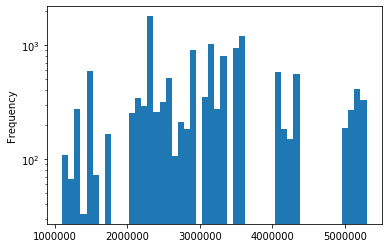

CO_UF_RESIDENCIA


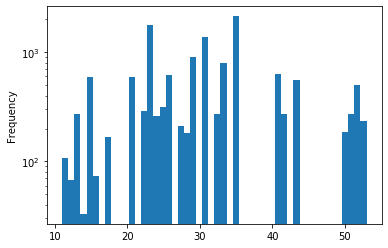

NU_IDADE


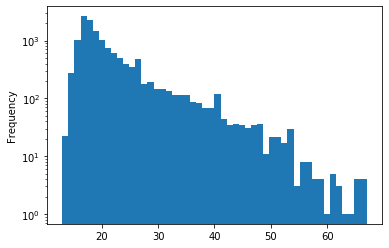

TP_COR_RACA


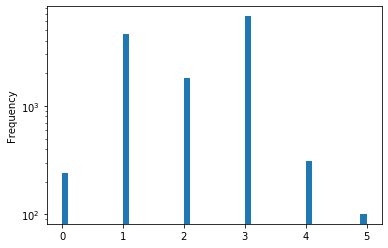

CO_MUNICIPIO_NASCIMENTO


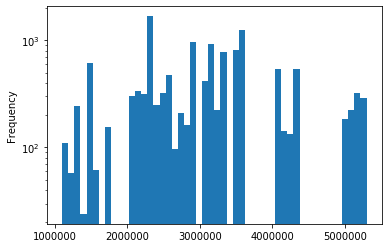

CO_UF_NASCIMENTO


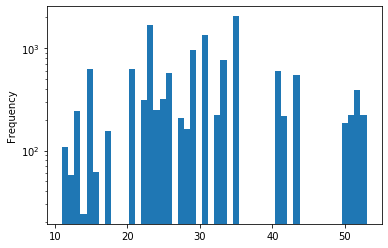

TP_ANO_CONCLUIU


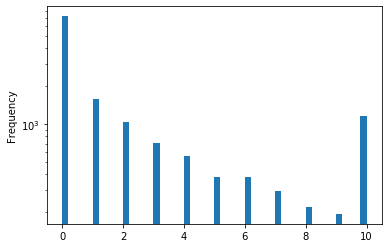

CO_ESCOLA


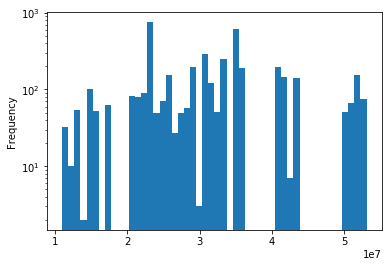

CO_MUNICIPIO_ESC


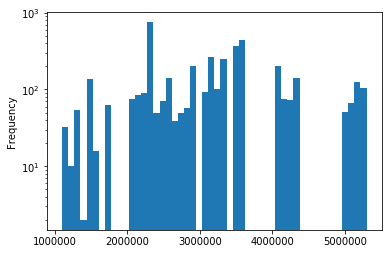

CO_UF_ESC


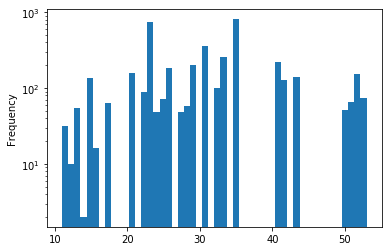

CO_UF_ENTIDADE_CERTIFICACAO


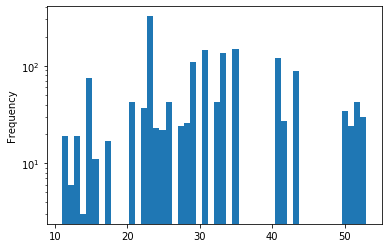

CO_MUNICIPIO_PROVA


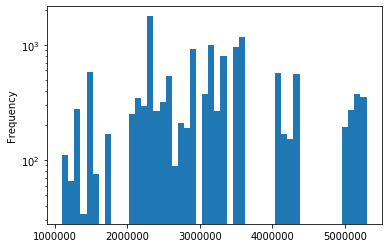

CO_UF_PROVA


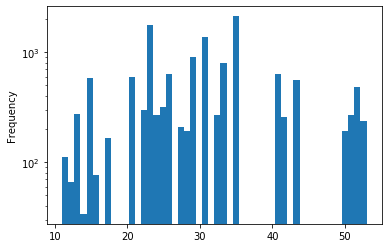

NU_NOTA_CN


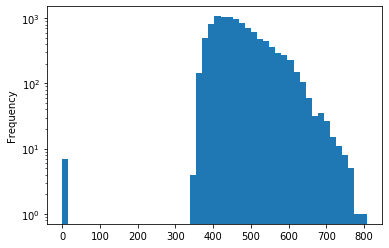

NU_NOTA_CH


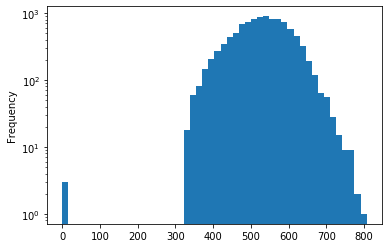

NU_NOTA_LC


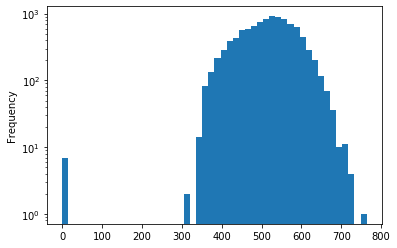

NU_NOTA_MT


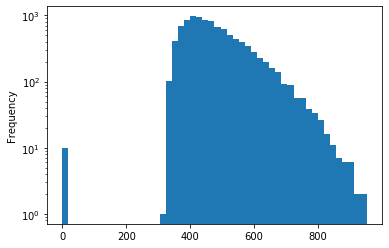

NU_NOTA_COMP1


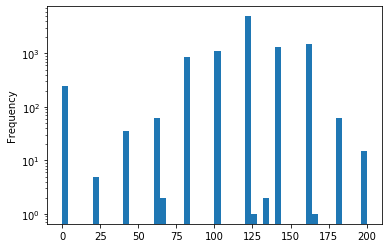

NU_NOTA_COMP2


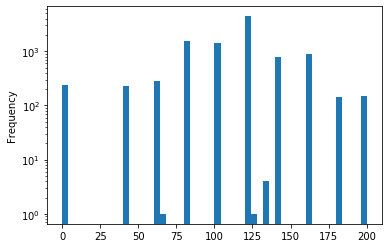

NU_NOTA_COMP3


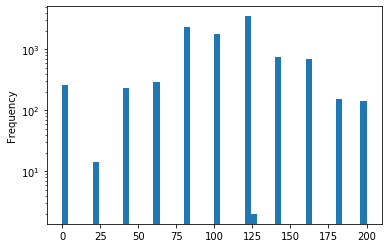

NU_NOTA_COMP4


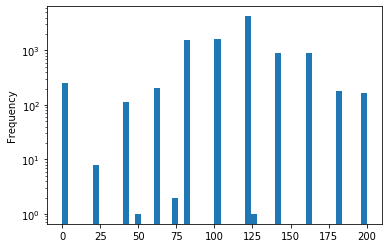

NU_NOTA_COMP5


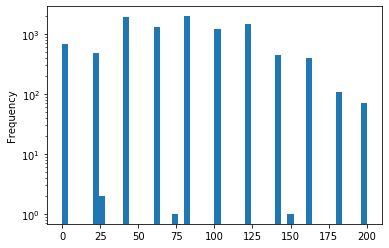

NU_NOTA_REDACAO


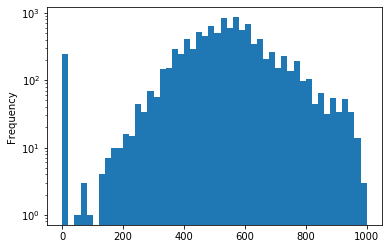

In [26]:
# Analise univariavel
for coluna in df_num2.columns:
    print(coluna)
    df_num2[coluna].plot.hist(bins = 50, log= True)
    plt.show()

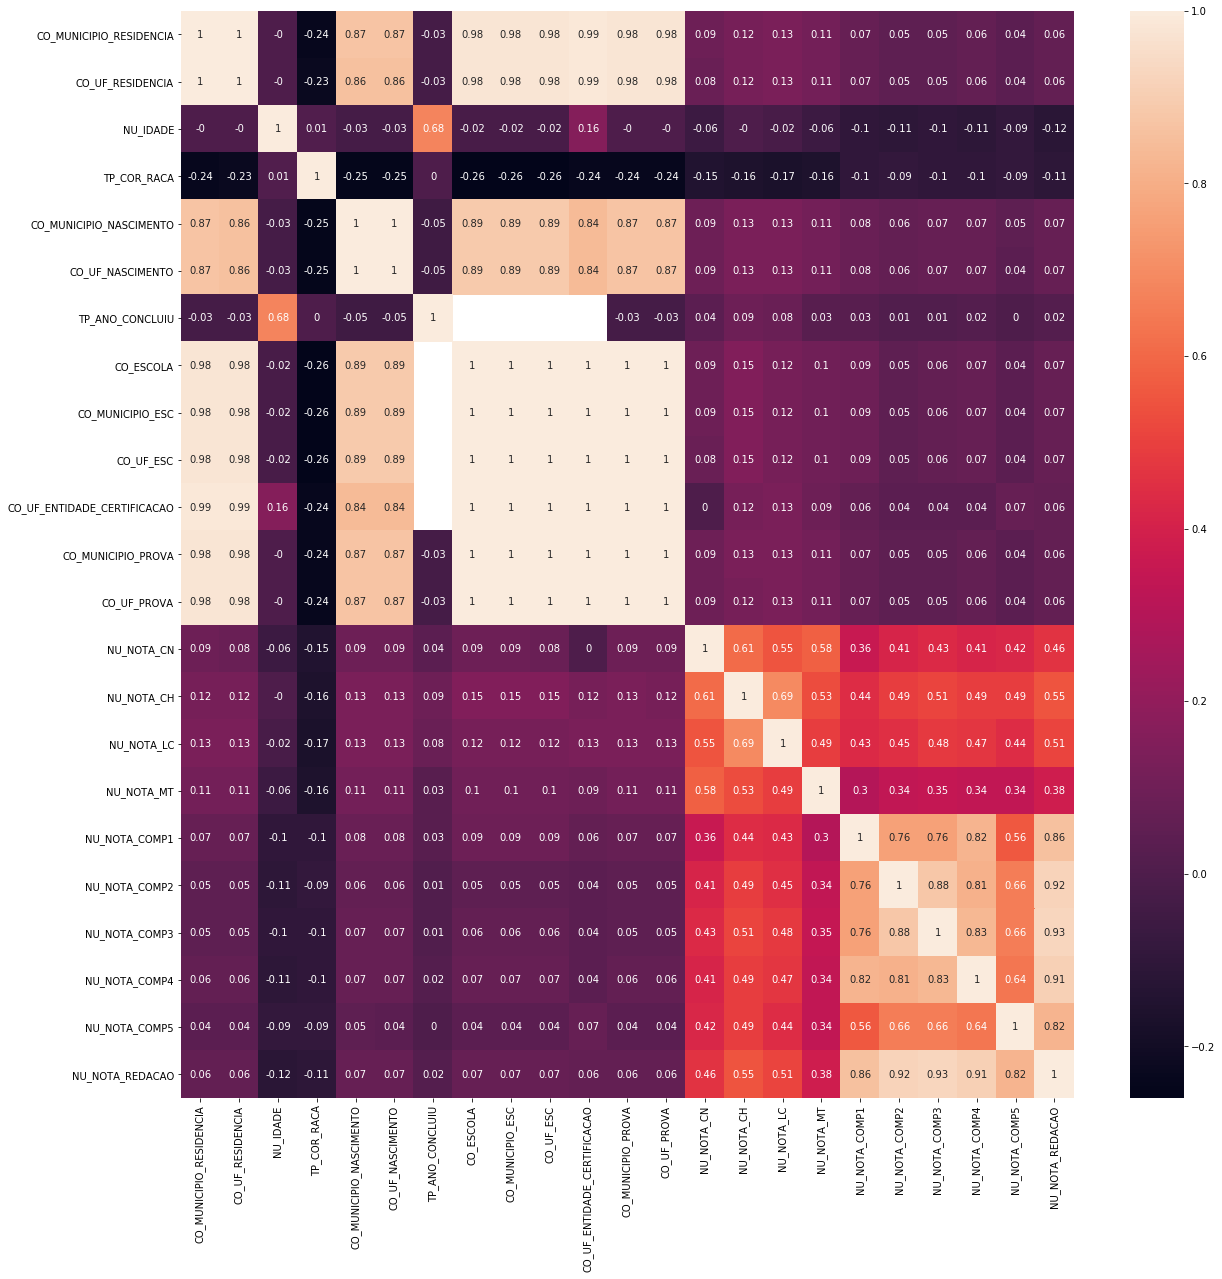

In [27]:
#Analisando a correlacao entre as variaveis númericas
plt.figure(figsize = (20,20))
sns.heatmap(df_num2.corr().round(2), annot= True)

## Dados de teste

In [28]:
# load test dataset
test = pd.read_csv('test.csv')

# create a copy 
df_test = test.copy()

In [29]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [30]:
df_test.shape

(4576, 47)

In [31]:
#drop columns about the questions
df_test = df_test.loc[:, ~df_test.columns.str.startswith('Q0')]

### Dados Faltantes

In [32]:
#a new dataframe to explore the variables
cons_test = pd.DataFrame({'columns' : df_test.columns,
                    'type': df_test.dtypes,
                    'missing' : df_test.isna().sum(),
                    'size' : df_test.shape[0],
                    'uniques': df_test.nunique()})
cons_test['proportion'] = round(cons_test['missing'] / cons_test['size'],2)

In [33]:
cons_test

,columns,type,missing,size,uniques,proportion
NU_INSCRICAO,NU_INSCRICAO,object,0,4576,4576,0.00
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,4576,27,0.00
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,4576,27,0.00
NU_IDADE,NU_IDADE,int64,0,4576,46,0.00
TP_SEXO,TP_SEXO,object,0,4576,2,0.00
TP_COR_RACA,TP_COR_RACA,int64,0,4576,6,0.00
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,4576,5,0.00
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,4576,4,0.00
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,4576,11,0.00
TP_ESCOLA,TP_ESCOLA,int64,0,4576,3,0.00


In [34]:
print('Contagem de colunas com ATÉ 20% de dados faltantes', cons_test[cons_test.proportion < 0.2].shape[0])
print('Contagem de colunas com 0% de dados faltantes',  cons_test[cons_test.proportion == 0].shape[0])

Contagem de colunas com ATÉ 20% de dados faltantes 27
Contagem de colunas com 0% de dados faltantes 27


Portanto, todas as colunas têm missing values.

In [35]:
# columns types without missing values
cons_test[cons_test.proportion == 0]['type'].value_counts()

int64     20
object     7
Name: type, dtype: int64

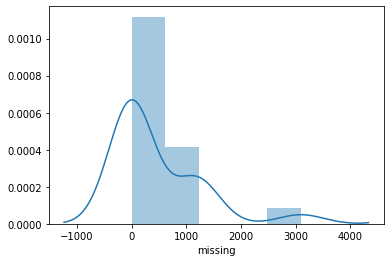

In [36]:
sns.distplot(cons_test.missing)

## Features do modelo

Nessa seção vamos selecionar as colunas dos dados de treino e de teste que serão usadas no modelo.

In [37]:
a = list(df_test.columns)
b = list(df_num2.columns)

In [38]:
features = list(set(a).intersection(b))

In [39]:
features

['NU_NOTA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_COMP5',
 'CO_UF_RESIDENCIA',
 'NU_NOTA_CH',
 'NU_NOTA_COMP4',
 'TP_COR_RACA',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP1',
 'TP_ANO_CONCLUIU',
 'NU_NOTA_COMP3',
 'NU_NOTA_REDACAO',
 'NU_IDADE']

# Modelos de Regressão

## Variável Dependente

In [40]:
y = df_train.NU_NOTA_MT.fillna(df_train.NU_NOTA_MT.mean())

In [41]:

y.describe()

count    13730.000000
mean       482.497928
std         85.757718
min          0.000000
25%        426.100000
50%        482.497928
75%        504.400000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

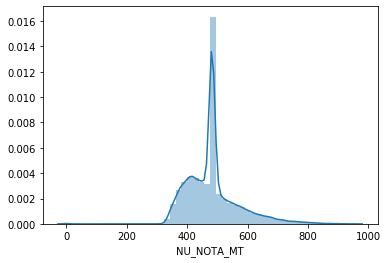

In [42]:
sns.distplot(y)

Parece ser normal

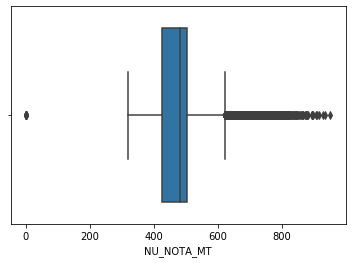

In [43]:
sns.boxplot(y)

## Features

In [44]:
x = df_train[features].apply(lambda x: x.fillna(x.mean()),axis=0)
x_test = df_test[features].apply(lambda x: x.fillna(x.mean()),axis=0)

In [45]:
# importando as bibliotecas
from sklearn.preprocessing import StandardScaler 

# instanciando a variável
sc = StandardScaler() 


# ajustando com os dados de treino
X_train = sc.fit_transform(x) 
X_test = sc.transform(x_test)

## Modelo de Regressão Linear

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [47]:
regressor = LinearRegression()  
regressor.fit(X_train, y)
y_pred = regressor.predict(X_test)

In [48]:
len(y_pred)

4576

In [49]:
len(X_test)

4576

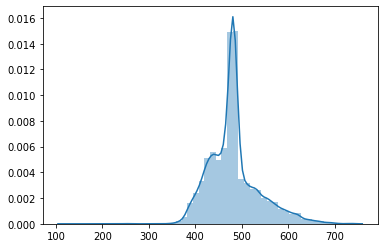

In [50]:
sns.distplot(y_pred)

Nota: 75.2

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [53]:
y_pred = regr.predict(X_test)

In [54]:
answer = pd.DataFrame(df_test.NU_INSCRICAO)
answer['NU_NOTA_MT'] = y_pred

76.19

# Normalizado

In [56]:
# importando as bibliotecas
from sklearn.preprocessing import Normalizer 

# instanciando a variável
norm = Normalizer() 


# ajustando com os dados de treino
X_train = norm.fit_transform(x) 
X_test = norm.transform(x_test)

In [57]:
regressor = RandomForestRegressor(max_depth=10, random_state=42) 
regressor.fit(X_train, y)
y_pred = regressor.predict(X_test)

In [58]:
answer = pd.DataFrame(df_test.NU_INSCRICAO)

In [59]:
answer['NU_NOTA_MT'] = y_pred

75.0

# PCA

In [88]:
x_pca = df_test.drop(['NU_INSCRICAO', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'SG_UF_RESIDENCIA', 'TP_SEXO'], axis = 1)

In [89]:
test_cols = list(x_pca.columns)
train_cols = list(df_train.columns)

In [90]:
features_pca = list(set(test_cols).intersection(train_cols))

In [91]:
xpca_test = x_pca[features_pca]

In [92]:
#a new dataframe to explore the variables
cons_pca = pd.DataFrame({'columns' : x_pca.columns,
                    'type': x_pca.dtypes,
                    'missing' : x_pca.isna().sum(),
                    'size' : x_pca.shape[0],
                    'uniques': x_pca.nunique()})
cons_pca['proportion'] = round(cons_pca['missing'] / cons_pca['size'],2)

In [93]:
# columns types without missing values
cons_pca[cons_pca.proportion > 0]['type'].value_counts()

float64    12
Name: type, dtype: int64

In [94]:
x_pca = df_train[features].apply(lambda x: x.fillna(x.mean()),axis=0)
x_pca_test = df_test[features].apply(lambda x: x.fillna(x.mean()),axis=0)

In [96]:
# importando as bibliotecas
from sklearn.preprocessing import MinMaxScaler 

# instanciando a variável
sc = MinMaxScaler() 


# ajustando com os dados de treino
X_pca_train= sc.fit_transform(x_pca) 
X_pca_test = sc.transform(x_pca_test)

In [98]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_pca_train)
X_train_pca = pca.transform(X_pca_train)
X_test_pca = pca.transform(X_pca_test)

In [100]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_pca, y)
y_pred = regr.predict(X_test_pca)

In [101]:
answer = pd.DataFrame(df_test.NU_INSCRICAO)
answer['NU_NOTA_MT'] = y_pred

 74.780617

In [102]:
answer.to_csv('answer.csv')